In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df = pd.read_csv('../dataset/full_COA_v3.csv.')

In [3]:
# take a look at the head of the data set
df.head()

,Time,COA,temp,dewPoint,humidity,windSpeed,year,quarter,month,day,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_name,hour_24,weekday_no,weekend_bool,school_vacation
0,2012-01-01 01:00:00,5986.0,13.98,0.01,0.38,3.09,2012,1,1,1,...,0,0,0,0,1,Sunday,1,6,0.0,0.0
1,2012-01-01 02:00:00,5547.0,11.98,0.99,0.47,2.06,2012,1,1,1,...,0,0,0,0,1,Sunday,2,6,0.0,0.0
2,2012-01-01 03:00:00,5233.0,11.98,0.99,0.47,2.06,2012,1,1,1,...,0,0,0,0,1,Sunday,3,6,0.0,0.0
3,2012-01-01 04:00:00,5150.0,11.98,0.01,0.44,2.06,2012,1,1,1,...,0,0,0,0,1,Sunday,4,6,0.0,0.0
4,2012-01-01 05:00:00,5235.0,11.98,0.01,0.44,3.60,2012,1,1,1,...,0,0,0,0,1,Sunday,5,6,0.0,0.0


In [4]:
# shape of training dataset
df.shape

(52607, 22)

In [5]:
# checking for nulls in all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52607 entries, 0 to 52606
Data columns (total 22 columns):
Time               52607 non-null object
COA                52607 non-null float64
temp               52607 non-null float64
dewPoint           52607 non-null float64
humidity           52607 non-null float64
windSpeed          52607 non-null float64
year               52607 non-null int64
quarter            52607 non-null int64
month              52607 non-null int64
day                52607 non-null int64
weekday_0          52607 non-null int64
weekday_1          52607 non-null int64
weekday_2          52607 non-null int64
weekday_3          52607 non-null int64
weekday_4          52607 non-null int64
weekday_5          52607 non-null int64
weekday_6          52607 non-null int64
weekday_name       52607 non-null object
hour_24            52607 non-null int64
weekday_no         52607 non-null int64
weekend_bool       52607 non-null float64
school_vacation    52607 non-null flo

In [6]:
# creating dummy variables for all categorical variables in the cleaned and merged dataset
df_d = pd.get_dummies(df.drop(columns=['Time']) , drop_first=True)
df_d.shape

(52607, 26)

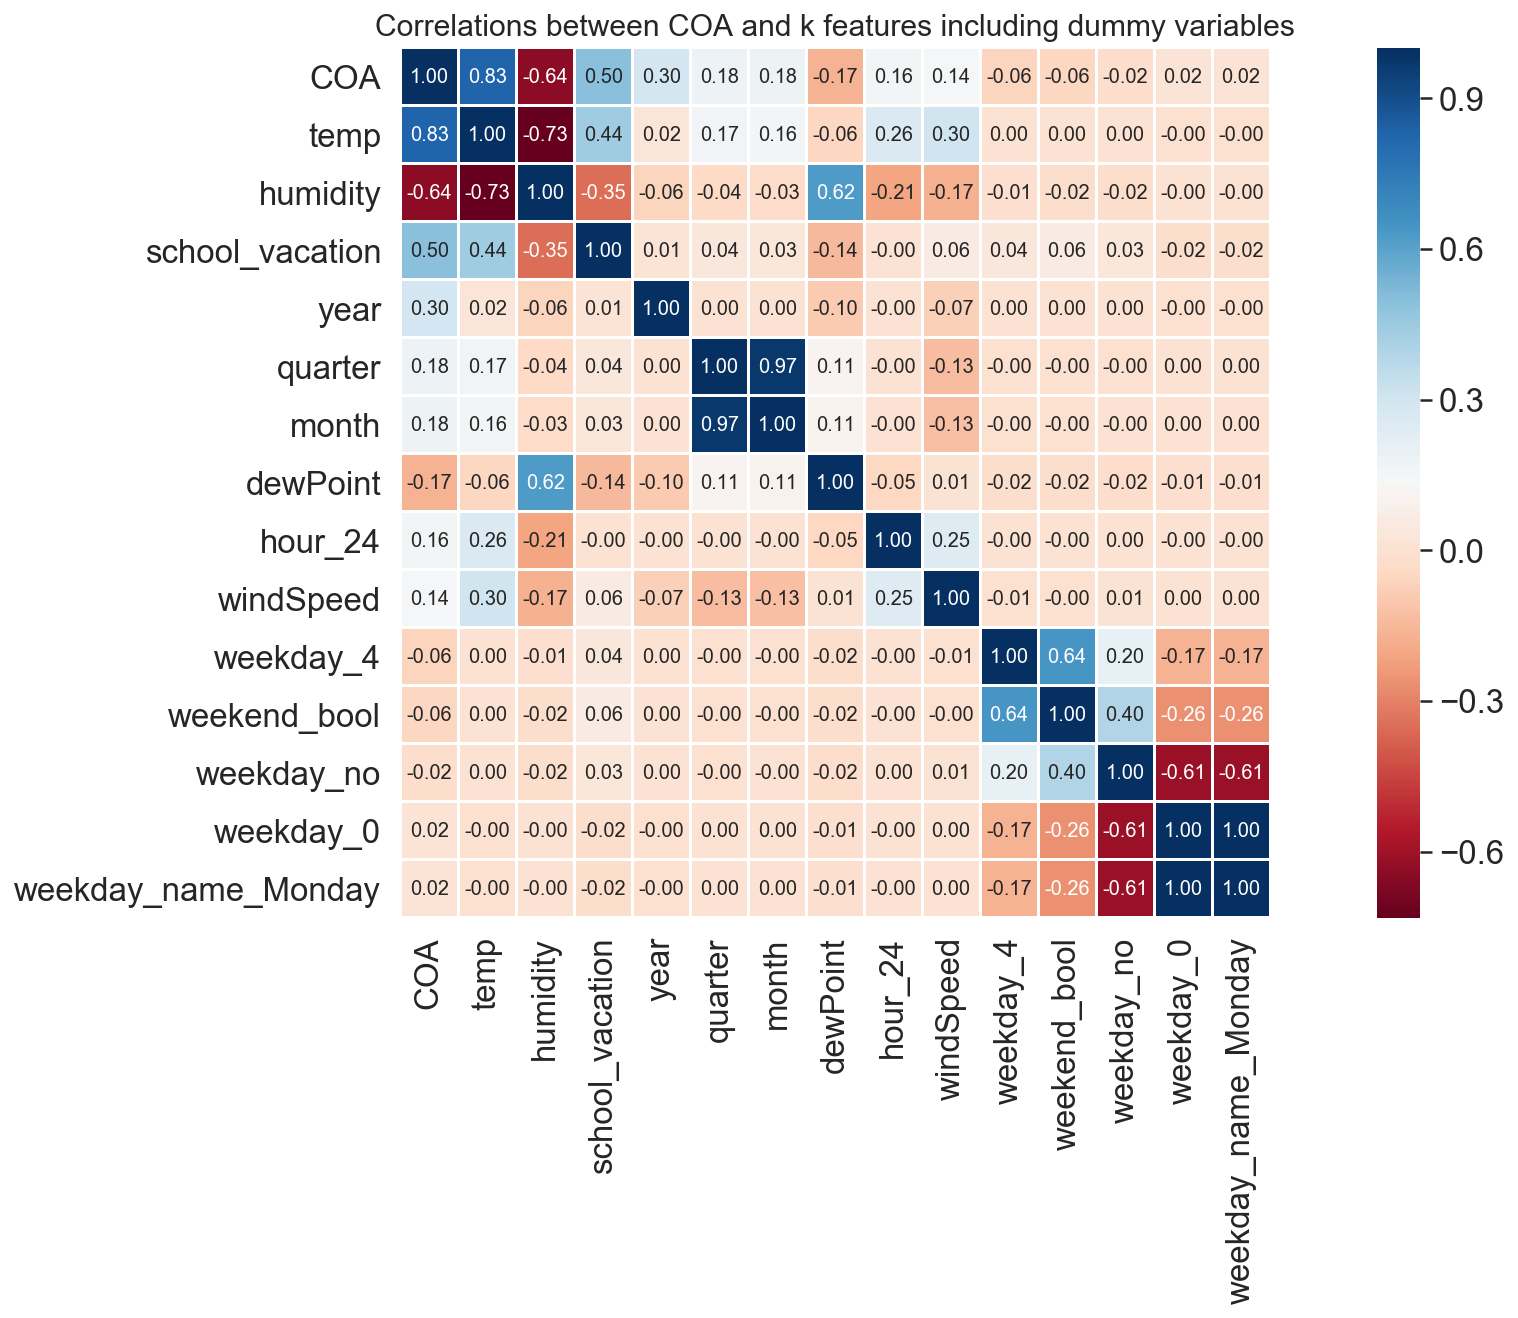

In [7]:
#COA correlation matrix
corrmat = abs(df_d.iloc[:df_d.shape[0],:].corr())
plt.figure(figsize=(17, 8))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'COA')['COA'].index
cm = np.corrcoef(df_d.iloc[:df_d.shape[0],:][cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
                 cmap = 'RdBu', linecolor = 'white', linewidth = 1)
plt.title("Correlations between COA and k features including dummy variables", fontsize =15)
plt.show()

In [8]:
# show head of dataset
df_d.head()

,COA,temp,dewPoint,humidity,windSpeed,year,quarter,month,day,weekday_0,...,hour_24,weekday_no,weekend_bool,school_vacation,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
0,5986.0,13.98,0.01,0.38,3.09,2012,1,1,1,0,...,1,6,0.0,0.0,0,0,1,0,0,0
1,5547.0,11.98,0.99,0.47,2.06,2012,1,1,1,0,...,2,6,0.0,0.0,0,0,1,0,0,0
2,5233.0,11.98,0.99,0.47,2.06,2012,1,1,1,0,...,3,6,0.0,0.0,0,0,1,0,0,0
3,5150.0,11.98,0.01,0.44,2.06,2012,1,1,1,0,...,4,6,0.0,0.0,0,0,1,0,0,0
4,5235.0,11.98,0.01,0.44,3.60,2012,1,1,1,0,...,5,6,0.0,0.0,0,0,1,0,0,0


In [9]:
# length to split
l_split = 8760

In [10]:
# length of dataframe
l_df = len(df_d)

In [11]:
# train split test with given length to split
train = df_d.iloc[:(l_df-l_split)]
test = df_d.iloc[(l_df-l_split):]

In [12]:
# tuple unpacking to make a regression problem
X_train, X_test, y_train, y_test = train.drop(columns=['COA']) , test.drop(columns=['COA']) , train.COA , test.COA

In [13]:
# importing scaler, then scale training and test dataframes
from sklearn.preprocessing import StandardScaler 

s = StandardScaler()

X_train_d_s = pd.DataFrame(s.fit_transform(X_train) , columns=X_train.columns)
X_test_d_s = pd.DataFrame(s.transform(X_test) , columns=X_test.columns)

In [14]:
# importing models 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [94]:
# define and fit the model
model = XGBRegressor()
model.fit(X_train_d_s , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, num_parallel_tree=1, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='auto', verbosity=1)

In [95]:
# getting train score
model.score(X_train_d_s , y_train)

0.9602958281079511

In [96]:
# getting test scores
model.score(X_test_d_s , y_test)

0.9289896221729768

In [98]:
# making range that cover test data to hold
pd.date_range('2017-01-01 00:00:00','2017-12-31 23:00:00' , freq='H')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [99]:
# making a dataframe to hold test predictions
predictions = pd.DataFrame(model.predict(X_test_d_s) , index=pd.date_range('2017-01-01 00:00:00','2017-12-31 23:00:00' , freq='H'), columns=['pred'])

In [100]:
# making a dataframe to hold test data
test = pd.DataFrame(y_test.values , index=pd.date_range('2017-01-01 00:00:00','2017-12-31 23:00:00' , freq='H') , columns=['test'])

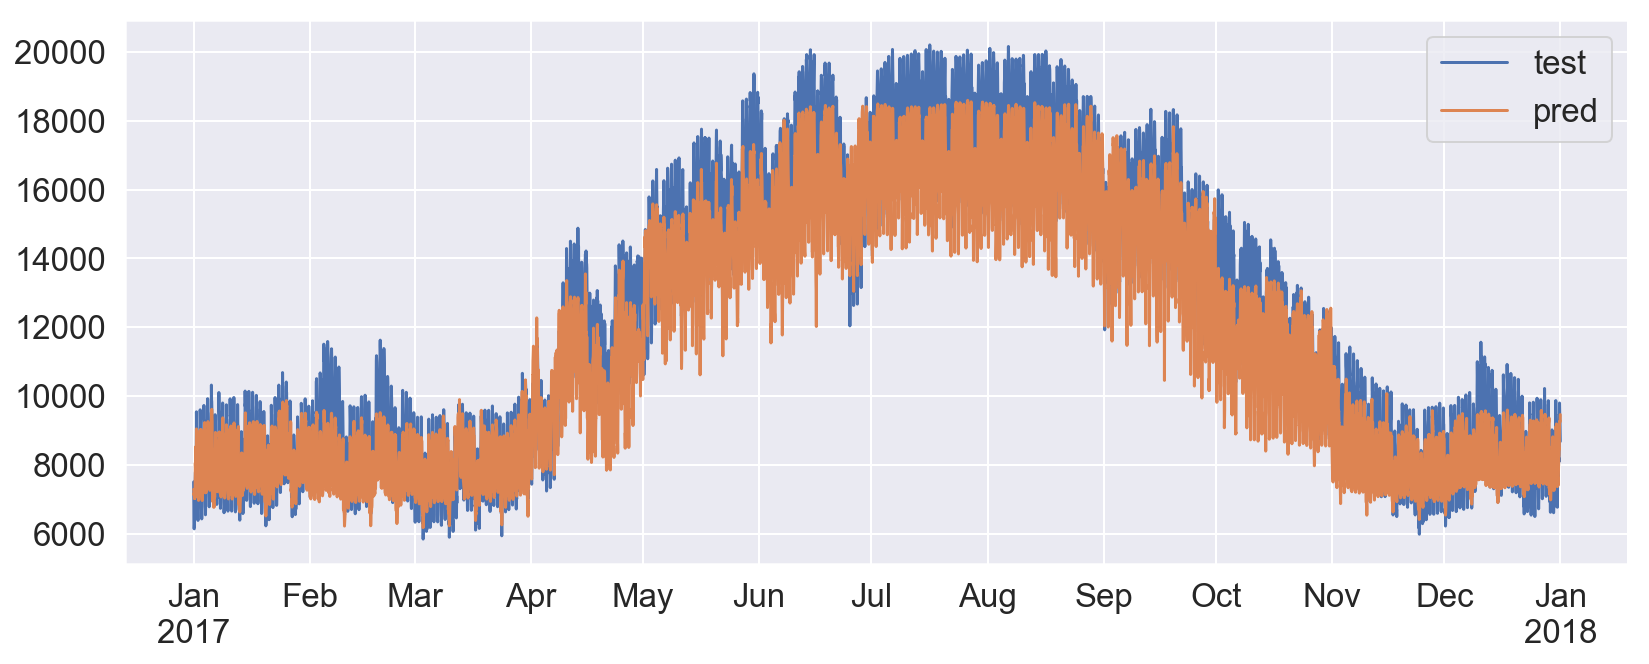

In [101]:
# plot prediction vs test
test.test.plot(figsize=(12,5) , legend=True)
predictions.pred.plot(legend=True)

In [102]:
# import metrics for evaluation 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [103]:
# calculate rmse
rmse(test.test , predictions.pred)

1071.8469415678826

In [104]:
# calculate r2 score
r2_score(test.test , predictions.pred)

0.9289896221729768